In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
df = pd.read_csv("olympics_08_medalists.csv")

In [10]:
df.head()

,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   medalist_name                 1875 non-null   object
 1   male_archery                  11 non-null     object
 2   female_archery                9 non-null      object
 3   male_athletics                85 non-null     object
 4   female_athletics              81 non-null     object
 5   male_badminton                12 non-null     object
 6   female_badminton              10 non-null     object
 7   male_baseball                 72 non-null     object
 8   male_basketball               35 non-null     object
 9   female_basketball             36 non-null     object
 10  male_boxing                   44 non-null     object
 11  male_canoeing and kayaking    53 non-null     object
 12  female_canoeing and kayaking  21 non-null     object
 13  male_road bicycle 

In [14]:
df.isnull().sum()

medalist_name                    0
male_archery                  1864
female_archery                1866
male_athletics                1790
female_athletics              1794
                              ... 
male_weightlifting            1851
female_weightlifting          1854
male_freestyle wrestling      1847
female_freestyle wrestling    1859
male_greco-roman wrestling    1848
Length: 71, dtype: int64

In [23]:
print(df.columns)

Index(['medalist_name', 'male_archery', 'female_archery', 'male_athletics',
       'female_athletics', 'male_badminton', 'female_badminton',
       'male_baseball', 'male_basketball', 'female_basketball', 'male_boxing',
       'male_canoeing and kayaking', 'female_canoeing and kayaking',
       'male_road bicycle racing', 'female_road bicycle racing',
       'male_track cycling', 'female_track cycling', 'male_mountain biking',
       'female_mountain biking', 'male_bmx', 'female_bmx', 'male_diving',
       'female_diving', 'female_equestrian sport', 'male_equestrian sport',
       'male_fencing', 'female_fencing', 'male_field hockey',
       'female_field hockey', 'male_association football',
       'female_association football', 'male_artistic gymnastics',
       'female_artistic gymnastics', 'female_rhythmic gymnastics',
       'male_trampoline gymnastics', 'female_trampoline gymnastics',
       'male_handball', 'female_handball', 'male_judo', 'female_judo',
       'male_modern penta

In [27]:
# Reformatting the Columns
tidy_df = pd.melt(df, id_vars=["medalist_name"], var_name="sport_gender", value_name="medals")

In [33]:
# Splittig the Columns
tidy_df[['gender', 'sport']] = tidy_df['sport_gender'].str.split('_', n=1, expand=True)
tidy_df.drop(columns=['sport_gender'], inplace=True)

In [49]:
# Cleaning up prefixes
tidy_df['sport'] = tidy_df['sport'].str.replace('male_', '', regex=False)
tidy_df['sport'] = tidy_df['sport'].str.replace('female_', '', regex=False)

In [39]:
# Removing special characters
tidy_df['sport'] = tidy_df['sport'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

In [41]:
# Removing extra whitespace
tidy_df['sport'] = tidy_df['sport'].str.strip()

In [43]:
print(tidy_df['sport'].unique())

['archery' 'athletics' 'badminton' 'baseball' 'basketball' 'boxing'
 'canoeing and kayaking' 'road bicycle racing' 'track cycling'
 'mountain biking' 'bmx' 'diving' 'equestrian sport' 'fencing'
 'field hockey' 'association football' 'artistic gymnastics'
 'rhythmic gymnastics' 'trampoline gymnastics' 'handball' 'judo'
 'modern pentathlon' 'rowing' 'sailing' 'shooting sport' 'softball'
 'swimming' 'synchronized swimming' 'table tennis' 'taekwondo' 'tennis'
 'triathlon' 'beach volleyball' 'volleyball' 'water polo' 'weightlifting'
 'freestyle wrestling' 'grecoroman wrestling']


In [45]:
print(tidy_df)

            medalist_name medals gender                 sport
0         Aaron Armstrong    NaN   male               archery
1           Aaron Peirsol    NaN   male               archery
2        Abdullo Tangriev    NaN   male               archery
3       Abeer Abdelrahman    NaN   male               archery
4                 Abhinav    NaN   male               archery
...                   ...    ...    ...                   ...
131245        Éver Banega    NaN   male  grecoroman wrestling
131246  Ólafur Stefánsson    NaN   male  grecoroman wrestling
131247      Óscar Brayson    NaN   male  grecoroman wrestling
131248   Łukasz Pawłowski    NaN   male  grecoroman wrestling
131249        Živko Gocić    NaN   male  grecoroman wrestling

[131250 rows x 4 columns]


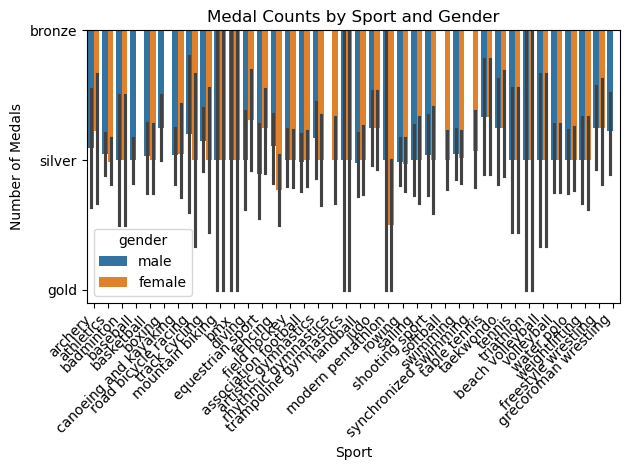

In [65]:
# Creating a bar graph - Visualization #1
sns.barplot(data=tidy_df, x='sport', y='medals', hue='gender')
plt.title("Medal Counts by Sport and Gender")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Sport")
plt.ylabel("Number of Medals")
plt.tight_layout()
plt.show()

In [151]:
#Creating a histogram for the distribution of medals- Visualization 2
print(tidy_df['medals'].dtype)
print(tidy_df['medals'].unique())

object
[0 'bronze' 'silver' 'gold']


In [153]:
tidy_df['medals'] = pd.to_numeric(tidy_df['medals'], errors='coerce')
tidy_df['medals'] = tidy_df['medals'].fillna(0)
print(tidy_df['medals'].dtype)
print(tidy_df['medals'].unique())


float64
[0.]


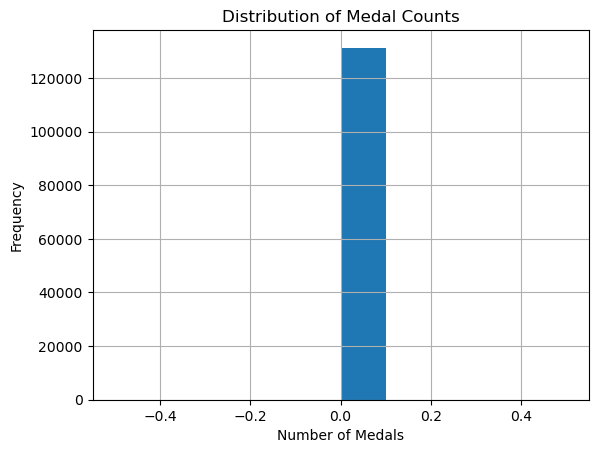

In [155]:
tidy_df['medals'].hist(bins=10)
plt.title("Distribution of Medal Counts")
plt.xlabel("Number of Medals")
plt.ylabel("Frequency")
plt.show()

In [165]:
# Create a pivot table to aggregate medals by sport and gender
print(tidy_df.columns)

Index(['medalist_name', 'sport_gender', 'medals'], dtype='object')


In [167]:
tidy_df[['gender', 'sport']] = tidy_df['sport_gender'].str.split('_', n=1, expand=True)

In [169]:
print(tidy_df.head())

       medalist_name  sport_gender  medals gender    sport
0    Aaron Armstrong  male_archery     0.0   male  archery
1      Aaron Peirsol  male_archery     0.0   male  archery
2   Abdullo Tangriev  male_archery     0.0   male  archery
3  Abeer Abdelrahman  male_archery     0.0   male  archery
4            Abhinav  male_archery     0.0   male  archery


In [171]:
pivot_table = pd.pivot_table(
    tidy_df,
    values='medals',
    index='sport',
    columns='gender',
    aggfunc='sum',
    fill_value=0
)
print(pivot_table)

gender                 female  male
sport                              
archery                   0.0   0.0
artistic gymnastics       0.0   0.0
association football      0.0   0.0
athletics                 0.0   0.0
badminton                 0.0   0.0
baseball                  0.0   0.0
basketball                0.0   0.0
beach volleyball          0.0   0.0
bmx                       0.0   0.0
boxing                    0.0   0.0
canoeing and kayaking     0.0   0.0
diving                    0.0   0.0
equestrian sport          0.0   0.0
fencing                   0.0   0.0
field hockey              0.0   0.0
freestyle wrestling       0.0   0.0
greco-roman wrestling     0.0   0.0
handball                  0.0   0.0
judo                      0.0   0.0
modern pentathlon         0.0   0.0
mountain biking           0.0   0.0
rhythmic gymnastics       0.0   0.0
road bicycle racing       0.0   0.0
rowing                    0.0   0.0
sailing                   0.0   0.0
shooting sport            0.